<font color="#de3023"><h1><b>REMINDER: MAKE A COPY OF THIS NOTEBOOK, DO NOT EDIT</b></h1></font>

# Lab 3: Regression

Just as naive Bayes (discussed earlier in [In Depth: Naive Bayes Classification](05.05-Naive-Bayes.ipynb)) is a good starting point for classification tasks, linear regression models are a good starting point for regression tasks.
Such models are popular because they can be fit very quickly, and are very interpretable.
You are probably familiar with the simplest form of a linear regression model (i.e., fitting a straight line to data) but such models can be extended to model more complicated data behavior.

In this section we will start with a quick intuitive walk-through of the mathematics behind this well-known problem, before seeing how before moving on to see how linear models can be generalized to account for more complicated patterns in data.

We begin with the standard imports:

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [ ]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)

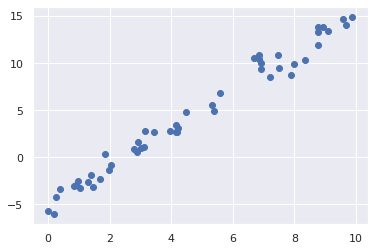

In [ ]:
#############################################################################
# Task
# • As review, plot a scatterplot of x vs. y using matplotlib
#############################################################################

# Replace "____" statements with your code
plt.scatter(x, y)

## Simple Linear Regression

We will start with the most familiar linear regression, a straight-line fit to data.
A straight-line fit is a model of the form
$$
y = ax + b
$$
where $a$ is commonly known as the *slope*, and $b$ is commonly known as the *intercept*.

Consider the following data, which is scattered about a line with a slope of 2 and an intercept of -5:

In [ ]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)

We can use Scikit-Learn's ``LinearRegression`` estimator to fit this data and construct the best-fit line:

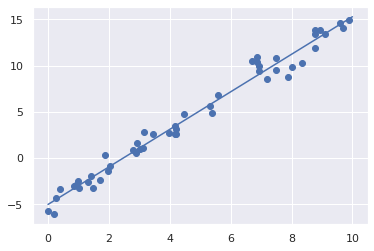

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

The slope and intercept of the data are contained in the model's fit parameters, which in Scikit-Learn are always marked by a trailing underscore.
Here the relevant parameters are ``coef_`` and ``intercept_``:

In [ ]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.0272088103606953
Model intercept: -4.998577085553204


In [ ]:
#############################################################################
# Task
# • Run OLS on the data below. Before you fit the data, what do you (approximately)
#   expect the model to return for the coef_[0] and intercept_?
#############################################################################

# Replace "____" statements with your code
rng = np.random.RandomState(1)
x = 50 * rng.rand(50)
y = 9 * x - 2 + rng.randn(50)

model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     9.005441762072138
Model intercept: -1.9985770855531655


We see that the results are very close to the inputs, as we might hope.

The ``LinearRegression`` estimator is much more capable than this, however—in addition to simple straight-line fits, it can also handle multidimensional linear models of the form
$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$
where there are multiple $x$ values.
Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyper-plane to points in higher dimensions.

The multidimensional nature of such regressions makes them more difficult to visualize, but we can see one of these fits in action by building some example data, using NumPy's matrix multiplication operator:

In [ ]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000056
[ 1.5 -2.   1. ]


In [ ]:
#############################################################################
# Task
# • Run OLS on the data below. Before you fit the data, what do you (approximately)
#   expect the model to return for the coef_ and intercept_?
#############################################################################

# Replace "____" statements with your code
x = 50 * np.random.random((50, 5))
y = x @ np.array([-2, -3, 4, 1, 9]) - 2 + rng.randn(50)

model = LinearRegression(fit_intercept=True)
model.fit(x, y)
print("Model slope:    ", model.coef_)
print("Model intercept:", model.intercept_)

Model slope:     [-1.995 -2.966  3.998  0.993  8.987]
Model intercept: -2.35514829255672


Here the $y$ data is constructed from three random $x$ values, and the linear regression recovers the coefficients used to construct the data.

In this way, we can use the single ``LinearRegression`` estimator to fit lines, planes, or hyperplanes to our data.
It still appears that this approach would be limited to strictly linear relationships between variables, but it turns out we can relax this as well.

# Introducing Pandas Objects

At the very basic level, Pandas objects can be thought of as enhanced versions of NumPy structured arrays in which the rows and columns are identified with labels rather than simple integer indices.
As we will see during the course of this chapter, Pandas provides a host of useful tools, methods, and functionality on top of the basic data structures, but nearly everything that follows will require an understanding of what these structures are.
Thus, before we go any further, let's introduce these three fundamental Pandas data structures: the ``Series``, ``DataFrame``, and ``Index``.

We will start our code sessions with the standard NumPy and Pandas imports:

In [ ]:
import numpy as np
import pandas as pd

## The Pandas Series Object

A Pandas ``Series`` is a one-dimensional array of indexed data.
It can be created from a list or array as follows:

In [ ]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

As we see in the output, the ``Series`` wraps both a sequence of values and a sequence of indices, which we can access with the ``values`` and ``index`` attributes.
The ``values`` are simply a familiar NumPy array:

In [ ]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

The ``index`` is an array-like object of type ``pd.Index``, which we'll discuss in more detail momentarily.

In [ ]:
data.index

RangeIndex(start=0, stop=4, step=1)

Like with a NumPy array, data can be accessed by the associated index via the familiar Python square-bracket notation:

In [ ]:
data[1]

0.5

In [ ]:
data[1:3]

1    0.50
2    0.75
dtype: float64

As we will see, though, the Pandas ``Series`` is much more general and flexible than the one-dimensional NumPy array that it emulates.

### ``Series`` as generalized NumPy array

From what we've seen so far, it may look like the ``Series`` object is basically interchangeable with a one-dimensional NumPy array.
The essential difference is the presence of the index: while the Numpy Array has an *implicitly defined* integer index used to access the values, the Pandas ``Series`` has an *explicitly defined* index associated with the values.

This explicit index definition gives the ``Series`` object additional capabilities. For example, the index need not be an integer, but can consist of values of any desired type.
For example, if we wish, we can use strings as an index:

In [ ]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

And the item access works as expected:

In [ ]:
data['b']

0.5

We can even use non-contiguous or non-sequential indices:

In [ ]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=[2, 5, 3, 7])
data

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

In [ ]:
data[5]

0.5

In [ ]:
#############################################################################
# Task
# • Grab indices 2 and 7 from the data. What happens if you try to grab 4?
#############################################################################

# Replace "____" statements with your code
print(data[2])
print(data[7])
print(data[4])

0.25
1.0


KeyError: ignored

### Series as specialized dictionary

In this way, you can think of a Pandas ``Series`` a bit like a specialization of a Python dictionary.
A dictionary is a structure that maps arbitrary keys to a set of arbitrary values, and a ``Series`` is a structure which maps typed keys to a set of typed values.
This typing is important: just as the type-specific compiled code behind a NumPy array makes it more efficient than a Python list for certain operations, the type information of a Pandas ``Series`` makes it much more efficient than Python dictionaries for certain operations.

The ``Series``-as-dictionary analogy can be made even more clear by constructing a ``Series`` object directly from a Python dictionary:

In [ ]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

By default, a ``Series`` will be created where the index is drawn from the sorted keys.
From here, typical dictionary-style item access can be performed:

In [ ]:
population['California']

38332521

Unlike a dictionary, though, the ``Series`` also supports array-style operations such as slicing:

In [ ]:
population['California':'Illinois']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

We'll discuss some of the quirks of Pandas indexing and slicing in [Data Indexing and Selection](03.02-Data-Indexing-and-Selection.ipynb).

### Constructing Series objects

We've already seen a few ways of constructing a Pandas ``Series`` from scratch; all of them are some version of the following:

```python
>>> pd.Series(data, index=index)
```

where ``index`` is an optional argument, and ``data`` can be one of many entities.

For example, ``data`` can be a list or NumPy array, in which case ``index`` defaults to an integer sequence:

In [ ]:
pd.Series([2, 4, 6])

0    2
1    4
2    6
dtype: int64

``data`` can be a scalar, which is repeated to fill the specified index:

In [ ]:
pd.Series(5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

``data`` can be a dictionary, in which ``index`` defaults to the sorted dictionary keys:

In [ ]:
pd.Series({2:'a', 1:'b', 3:'c'})

2    a
1    b
3    c
dtype: object

In each case, the index can be explicitly set if a different result is preferred:

In [ ]:
pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2])

3    c
2    a
dtype: object

Notice that in this case, the ``Series`` is populated only with the explicitly identified keys.

## The Pandas DataFrame Object

The next fundamental structure in Pandas is the ``DataFrame``.
Like the ``Series`` object discussed in the previous section, the ``DataFrame`` can be thought of either as a generalization of a NumPy array, or as a specialization of a Python dictionary.
We'll now take a look at each of these perspectives.

### DataFrame as a generalized NumPy array
If a ``Series`` is an analog of a one-dimensional array with flexible indices, a ``DataFrame`` is an analog of a two-dimensional array with both flexible row indices and flexible column names.
Just as you might think of a two-dimensional array as an ordered sequence of aligned one-dimensional columns, you can think of a ``DataFrame`` as a sequence of aligned ``Series`` objects.
Here, by "aligned" we mean that they share the same index.

To demonstrate this, let's first construct a new ``Series`` listing the area of each of the five states discussed in the previous section:

In [ ]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

Now that we have this along with the ``population`` Series from before, we can use a dictionary to construct a single two-dimensional object containing this information:

In [ ]:
states = pd.DataFrame({'population': population,
                       'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


Like the ``Series`` object, the ``DataFrame`` has an ``index`` attribute that gives access to the index labels:

In [ ]:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

Additionally, the ``DataFrame`` has a ``columns`` attribute, which is an ``Index`` object holding the column labels:

In [ ]:
states.columns

Index(['population', 'area'], dtype='object')

Thus the ``DataFrame`` can be thought of as a generalization of a two-dimensional NumPy array, where both the rows and columns have a generalized index for accessing the data.

In [ ]:
#############################################################################
# Task
# • Grab the "population" column from the the states dataframe
# • Find the area of New York from the dataframe
# • Find the max area of any state in the dataframe
# • Find the sum of the populations in the dataframe
#############################################################################

# Replace "____" statements with your code
print(states["population"])
print(states["area"]["New York"])
print(np.max(states["area"]))
print(np.sum(states["population"]))

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
Name: population, dtype: int64
141297
695662
116866836


### DataFrame as specialized dictionary

Similarly, we can also think of a ``DataFrame`` as a specialization of a dictionary.
Where a dictionary maps a key to a value, a ``DataFrame`` maps a column name to a ``Series`` of column data.
For example, asking for the ``'area'`` attribute returns the ``Series`` object containing the areas we saw earlier:

In [ ]:
states['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

Notice the potential point of confusion here: in a two-dimesnional NumPy array, ``data[0]`` will return the first *row*. For a ``DataFrame``, ``data['col0']`` will return the first *column*.
Because of this, it is probably better to think about ``DataFrame``s as generalized dictionaries rather than generalized arrays, though both ways of looking at the situation can be useful.
We'll explore more flexible means of indexing ``DataFrame``s in [Data Indexing and Selection](03.02-Data-Indexing-and-Selection.ipynb).

### Indexers: loc, iloc, and ix

These slicing and indexing conventions can be a source of confusion.
For example, if your ``Series`` has an explicit integer index, an indexing operation such as ``data[1]`` will use the explicit indices, while a slicing operation like ``data[1:3]`` will use the implicit Python-style index.

In [ ]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [ ]:
# explicit index when indexing
data[1]

'a'

In [ ]:
# implicit index when slicing
data[1:3]

3    b
5    c
dtype: object

Because of this potential confusion in the case of integer indexes, Pandas provides some special *indexer* attributes that explicitly expose certain indexing schemes.
These are not functional methods, but attributes that expose a particular slicing interface to the data in the ``Series``.

First, the ``loc`` attribute allows indexing and slicing that always references the explicit index:

In [ ]:
data.loc[1]

'a'

In [ ]:
data.loc[1:3]

1    a
3    b
dtype: object

The ``iloc`` attribute allows indexing and slicing that always references the implicit Python-style index:

In [ ]:
data.iloc[1]

'b'

In [ ]:
data.iloc[1:3]

3    b
5    c
dtype: object

A third indexing attribute, ``ix``, is a hybrid of the two, and for ``Series`` objects is equivalent to standard ``[]``-based indexing.
The purpose of the ``ix`` indexer will become more apparent in the context of ``DataFrame`` objects, which we will discuss in a moment.

One guiding principle of Python code is that "explicit is better than implicit."
The explicit nature of ``loc`` and ``iloc`` make them very useful in maintaining clean and readable code; especially in the case of integer indexes, I recommend using these both to make code easier to read and understand, and to prevent subtle bugs due to the mixed indexing/slicing convention.

In [ ]:
#############################################################################
# Task
# • Using either iloc or loc (think about which you should use!), print the
#   first two rows of the states dataframe
#############################################################################

# Replace "____" statements with your code
print(states.iloc[:2])

            population    area
California    38332521  423967
Texas         26448193  695662


## Data Selection in DataFrame

Recall that a ``DataFrame`` acts in many ways like a two-dimensional or structured array, and in other ways like a dictionary of ``Series`` structures sharing the same index.
These analogies can be helpful to keep in mind as we explore data selection within this structure.

### DataFrame as a dictionary

The first analogy we will consider is the ``DataFrame`` as a dictionary of related ``Series`` objects.
Let's return to our example of areas and populations of states:

In [ ]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


The individual ``Series`` that make up the columns of the ``DataFrame`` can be accessed via dictionary-style indexing of the column name:

In [ ]:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

Equivalently, we can use attribute-style access with column names that are strings:

In [ ]:
data.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

This attribute-style column access actually accesses the exact same object as the dictionary-style access:

In [ ]:
data.area is data['area']

True

Though this is a useful shorthand, keep in mind that it does not work for all cases!
For example, if the column names are not strings, or if the column names conflict with methods of the ``DataFrame``, this attribute-style access is not possible.
For example, the ``DataFrame`` has a ``pop()`` method, so ``data.pop`` will point to this rather than the ``"pop"`` column:

In [ ]:
data.pop is data['pop']

False

In particular, you should avoid the temptation to try column assignment via attribute (i.e., use ``data['pop'] = z`` rather than ``data.pop = z``).

Like with the ``Series`` objects discussed earlier, this dictionary-style syntax can also be used to modify the object, in this case adding a new column:

In [ ]:
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


This shows a preview of the straightforward syntax of element-by-element arithmetic between ``Series`` objects; we'll dig into this further in [Operating on Data in Pandas](03.03-Operations-in-Pandas.ipynb).

In [ ]:
#############################################################################
# Task
# • Construct a "sq_pop" column that is the square of the "population" column
#   and print its mean
# • Construct a "pop_area" that's the product of the population and area
#############################################################################

# Replace "____" statements with your code
data["sq_pop"] = data["pop"] ** 2
print(np.mean(data["sq_pop"]))

data["pop_area"] = data["pop"] * data["area"]

620663921577728.8


### DataFrame as two-dimensional array

As mentioned previously, we can also view the ``DataFrame`` as an enhanced two-dimensional array.
We can examine the raw underlying data array using the ``values`` attribute:

In [ ]:
data.values

array([[4.240e+05, 3.833e+07, 9.041e+01, 1.469e+15, 1.625e+13],
       [6.957e+05, 2.645e+07, 3.802e+01, 6.995e+14, 1.840e+13],
       [1.413e+05, 1.965e+07, 1.391e+02, 3.862e+14, 2.777e+12],
       [1.703e+05, 1.955e+07, 1.148e+02, 3.823e+14, 3.330e+12],
       [1.500e+05, 1.288e+07, 8.588e+01, 1.659e+14, 1.932e+12]])

# Basic TF Regression

In a *regression* problem, the aim is to predict the output of a continuous value, like a price or a probability. Contrast this with a *classification* problem, where the aim is to select a class from a list of classes (for example, where a picture contains an apple or an orange, recognizing which fruit is in the picture).

This tutorial uses the classic [Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg) dataset and demonstrates how to build models to predict the fuel efficiency of the late-1970s and early 1980s automobiles. To do this, you will provide the models with a description of many automobiles from that time period. This description includes attributes like cylinders, displacement, horsepower, and weight.

This example uses the Keras API. (Visit the Keras [tutorials](https://www.tensorflow.org/tutorials/keras) and [guides](https://www.tensorflow.org/guide/keras) to learn more.)

In [ ]:
# Use seaborn for pairplot.
!pip install -q seaborn

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.8.2


## The Auto MPG dataset

The dataset is available from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/).


### Get the data
First download and import the dataset using pandas:

In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [ ]:
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


### Clean the data

The dataset contains a few unknown values:

In [ ]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

Drop those rows to keep this initial tutorial simple:

In [ ]:
dataset = dataset.dropna()

The `"Origin"` column is categorical, not numeric. So the next step is to one-hot encode the values in the column with [pd.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html).

Note: You can set up the `tf.keras.Model` to do this kind of transformation for you but that's beyond the scope of this tutorial. Check out the [Classify structured data using Keras preprocessing layers](../structured_data/preprocessing_layers.ipynb) or [Load CSV data](../load_data/csv.ipynb) tutorials for examples.

In [ ]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [ ]:
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


### Split the data into training and test sets

Now, split the dataset into a training set and a test set. You will use the test set in the final evaluation of your models.

In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

### Split features from labels

Separate the target value—the "label"—from the features. This label is the value that you will train the model to predict.

In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

## Normalization

In the table of statistics it's easy to see how different the ranges of each feature are:

In [ ]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
MPG,23.310510,7.728652
Cylinders,5.477707,1.699788
Displacement,195.318471,104.331589
Horsepower,104.869427,38.096214
Weight,2990.251592,843.898596
Acceleration,15.559236,2.789230
Model Year,75.898089,3.675642
Europe,0.178344,0.383413
Japan,0.197452,0.398712
USA,0.624204,0.485101


It is good practice to normalize features that use different scales and ranges.

One reason this is important is because the features are multiplied by the model weights. So, the scale of the outputs and the scale of the gradients are affected by the scale of the inputs.

Although a model *might* converge without feature normalization, normalization makes training much more stable.

Note: There is no advantage to normalizing the one-hot features—it is done here for simplicity. For more details on how to use the preprocessing layers, refer to the [Working with preprocessing layers](https://www.tensorflow.org/guide/keras/preprocessing_layers) guide and the [Classify structured data using Keras preprocessing layers](../structured_data/preprocessing_layers.ipynb) tutorial.

## Linear regression

Before building a deep neural network model, start with linear regression using one and several variables.

### Linear regression with one variable

Begin with a single-variable linear regression to predict `'MPG'` from `'Horsepower'`.

Training a model with `tf.keras` typically starts by defining the model architecture. Use a `tf.keras.Sequential` model, which [represents a sequence of steps](https://www.tensorflow.org/guide/keras/sequential_model).

There are two steps in your single-variable linear regression model:

- Normalize the `'Horsepower'` input features using the `tf.keras.layers.Normalization` preprocessing layer.
- Apply a linear transformation ($y = mx+b$) to produce 1 output using a linear layer (`tf.keras.layers.Dense`).

The number of _inputs_ can either be set by the `input_shape` argument, or automatically when the model is run for the first time.

In [ ]:
horsepower = np.expand_dims(np.array(train_features['Horsepower']), axis=1)

Build the Keras Sequential model:

In [ ]:
horsepower_model = tf.keras.Sequential([
    layers.Dense(units=1)
])

This model will predict `'MPG'` from `'Horsepower'`.

Run the untrained model on the first 10 'Horsepower' values. The output won't be good, but notice that it has the expected shape of `(10, 1)`:

In [ ]:
#############################################################################
# Task
# • Find the predictions for the first 10 values of horsepower (recall the .predict() function)
#############################################################################

# Replace "____" statements with your code
horsepower_model.predict(horsepower[:10])

array([[-126.248],
       [-148.132],
       [-269.33 ],
       [-106.049],
       [-112.782],
       [-151.498],
       [-100.999],
       [-112.782],
       [-159.915],
       [-148.132]], dtype=float32)

Once the model is built, configure the training procedure using the Keras `Model.compile` method. The most important arguments to compile are the `loss` and the `optimizer`, since these define what will be optimized (`mean_absolute_error`) and how (using the `tf.keras.optimizers.Adam`).

In [ ]:
#############################################################################
# Task
# • Compile the model w/ the Adam optimizer and "mae" as the loss
#############################################################################

# Replace "____" statements with your code
horsepower_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mae')

Use Keras `Model.fit` to execute the training for 100 epochs:

In [ ]:
#############################################################################
# Task
# • Fit the model on horsepower (against train_labels) for 100 epochs
#############################################################################

# Replace "____" statements with your code
history = horsepower_model.fit(horsepower, train_labels, epochs=200, verbose=False)

Visualize the model's training progress using the stats stored in the `history` object:

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,epoch
95,4.070181,95
96,3.996736,96
97,4.011328,97
98,4.244672,98
99,3.967122,99


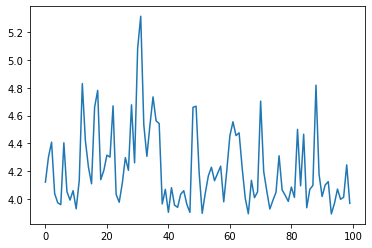

In [ ]:
plt.plot(history.history['loss'])
plt.show()

Collect the results on the test set for later:

In [ ]:
test_results = {}

test_results['horsepower_model'] = horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels, verbose=0)

Since this is a single variable regression, it's easy to view the model's predictions as a function of the input:

In [ ]:
x = tf.linspace(0.0, 250, 251)
y = horsepower_model.predict(x)

In [ ]:
def plot_horsepower(x, y):
  plt.scatter(train_features['Horsepower'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()

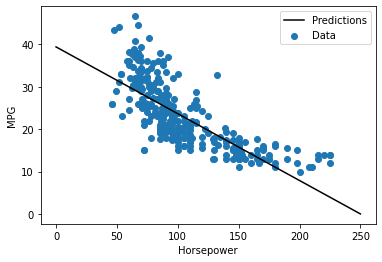

In [ ]:
plot_horsepower(x, y)

In [ ]:
def plot_horsepower(x, y):
  plt.scatter(train_features['Horsepower'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()

Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 1905.1509
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 1871.0511
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 1837.4125
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 1803.5048
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 1769.7484
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 1735.7635
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 1702.0161
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 1667.9812
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 1634.6384
Epoch 10/100
10/10 [==============================] - 0s 5ms/step - loss: 1600.3453
Epoch 11/100
10/10 [==============================] - 0s 3ms/step - loss: 1566.6777
Epoch 12/100
10/10 [==============================] - 0s 3ms/step - loss: 1533.0042
E

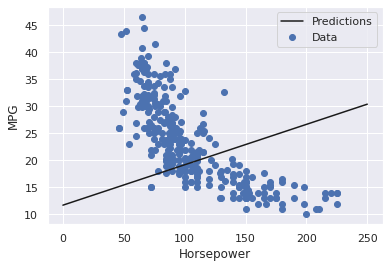

In [ ]:
#############################################################################
# Task
# • Repeat the above, but now fit the model with all of train_features (instead
#   of just the horsepower). Recall this involves three steps:
# - Define model
# - Compile model
# - Train/fit model
#############################################################################

# Replace "____" statements with your code
full_model = tf.keras.Sequential([
    layers.Dense(units=1)
])
full_model.compile(optimizer="adam", loss='mae')
history = full_model.fit(train_features, train_labels, epochs=100)

## Regression with a deep neural network (DNN)

In the previous section, you implemented two linear models for single and multiple inputs.

Here, you will implement single-input and multiple-input DNN models.

The code is basically the same except the model is expanded to include some "hidden" non-linear layers. The name "hidden" here just means not directly connected to the inputs or outputs.

These models will contain a few more layers than the linear model:

* The normalization layer, as before (with `horsepower_normalizer` for a single-input model and `normalizer` for a multiple-input model).
* Two hidden, non-linear, `Dense` layers with the ReLU (`relu`) activation function nonlinearity.
* A linear `Dense` single-output layer.

Both models will use the same training procedure, so the `compile` method is included in the `build_and_compile_model` function below.

In [ ]:
def build_and_compile_model():
  model = keras.Sequential([
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(optimizer="adam", loss='mae')
  return model

### Regression using a DNN and a single input

In [ ]:
dnn_horsepower_model = build_and_compile_model()


This model has quite a few more trainable parameters than the linear models:

In [ ]:
dnn_horsepower_model.predict(horsepower[:10])

array([[12.696],
       [14.896],
       [27.084],
       [10.664],
       [11.341],
       [15.235],
       [10.156],
       [11.341],
       [16.081],
       [14.896]], dtype=float32)

In [ ]:
#############################################################################
# Task
# • Find out how many parameters the model has now
#############################################################################

# Replace "____" statements with your code
dnn_horsepower_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 64)                128       
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                                 
 dense_15 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,353
Trainable params: 4,353
Non-trainable params: 0
_________________________________________________________________


Train the model with Keras `Model.fit`:

In [ ]:
#############################################################################
# Task
# • Train dnn_horsepower_model using Adam and MAE
#############################################################################

# Replace "____" statements with your code
history = dnn_horsepower_model.fit(horsepower, train_labels, epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 12.0567
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 12.2556
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 11.9758
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 11.9228
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 12.0597
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 12.0757
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 12.1071
Epoch 8/100
10/10 [==============================] - 0s 5ms/step - loss: 12.1811
Epoch 9/100
10/10 [==============================] - 0s 6ms/step - loss: 11.8371
Epoch 10/100
10/10 [==============================] - 0s 4ms/step - loss: 11.7926
Epoch 11/100
10/10 [==============================] - 0s 4ms/step - loss: 11.7498
Epoch 12/100
10/10 [==============================] - 0s 4ms/step - loss: 11.6847
Epoch 13/100
10/10 [=====

This model does slightly better than the linear single-input `horsepower_model`:

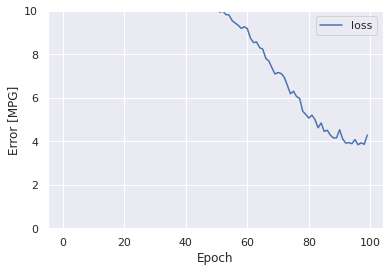

In [ ]:
plot_loss(history)

If you plot the predictions as a function of `'Horsepower'`, you should notice how this model takes advantage of the nonlinearity provided by the hidden layers:

In [ ]:
x = tf.linspace(0.0, 250, 251)
y = dnn_horsepower_model.predict(x)

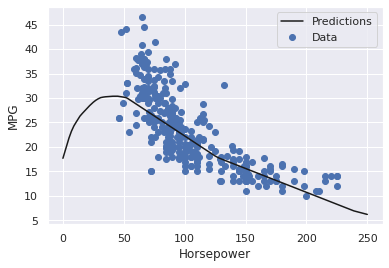

In [ ]:
plot_horsepower(x, y)

Collect the results on the test set for later:

In [ ]:
#############################################################################
# Task
# • Repeat the above, but now fit the DNN model with all of train_features (instead
#   of just the horsepower). Recall this involves three steps:
# - Define model: change the model to now have 5 layers (each of whatever size you want)
# - Compile model
# - Train/fit model
#############################################################################

# Replace "____" statements with your code
full_model = keras.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

full_model.compile(optimizer="adam", loss='mae')
history = full_model.fit(train_features, train_labels, epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 4ms/step - loss: 16.2236
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 8.5334
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 9.0139
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 8.1571
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 7.5585
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 7.9949
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 7.8963
Epoch 8/100
10/10 [==============================] - 0s 4ms/step - loss: 7.9543
Epoch 9/100
10/10 [==============================] - 0s 4ms/step - loss: 7.3258
Epoch 10/100
10/10 [==============================] - 0s 5ms/step - loss: 7.9852
Epoch 11/100
10/10 [==============================] - 0s 4ms/step - loss: 7.8681
Epoch 12/100
10/10 [==============================] - 0s 5ms/step - loss: 6.7648
Epoch 13/100
10/10 [================